In [1]:
import pandas as pd

Hello world!


# General Description

In our study, you will be asked to finish three exploratory data analysis tasks using GitHub Copilot. In each task, the number of quries/comments you can use is different. 

### Before you begin, attention!

- You can only use comment and auto-fill functions of Github Copilot to solve the task. 
- You can also fix small bugs like wrong variable name or wrong list index. 
- You can change the comment to generate new code as well.
- You cannot, however, write codes by yourself instead of using comment to generate. If you are not sure whether your action is permitted, please just ask us.
- Due to study requirement, we can only answer questions about the problem setting. We cannot answer questions about how to actually solve the problem. We may show you our solutions at the end of the task.
- The time limit for each part is **15 minutes**. If you believe that you have already finished the task before the time limit, or you feel that spending more time will not help you solve the problem, you can just tell us and move on. There is no need to worry about that.
- We encourage you to **think aloud** during the programming process, which will help us to know what users are thinking when using GitHub Copilot.

# Task 1

### Load data

In [2]:
df1 = pd.read_csv('equity_value_data.csv')
df1.head()

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


### Task Description

This data set contains information for investors with their equity in an online trading platform A. You can see that there are three columns in the data set. The `timestamp` indicates the when the record is written. The `close_equity` means the close equity of that user in a particular day. The `user_id` is the unique identifier of the user. Note that this data set **only records timestamps with `close_equity > 10`**, and thus you can find that the timestamps are not consecutive for some users. We call the missing timestamp period **`inactive period`**. In this task, you need to find out the percentage of users who have a consecutive `inactive period` longer than 28 days.

### Example
| timestamp            | close_equity | user_id                          |
|----------------------|--------------|----------------------------------|
| 2016-10-16T00:00:00Z | 48.16        | bcef4fa9b0bdf22bcf7deae708decf03 |
| 2016-10-17T00:00:00Z | 48.16        | bcef4fa9b0bdf22bcf7deae708decf03 |
| 2016-12-29T00:00:00Z | 48.16        | bcef4fa9b0bdf22bcf7deae708decf03 |
| 2016-10-16T00:00:00Z | 22.34        | 3276897f94d72719b16f1648f7166384 |
| 2016-10-17T00:00:00Z | 25.68        | 3276897f94d72719b16f1648f7166384 |
| 2016-11-01T00:00:00Z | 34.22        | 3276897f94d72719b16f1648f7166384 |

The answer for this example is 50%.

In this table, the user with id `bcef4fa9b0bdf22bcf7deae708decf03` has a consecutive inactive period longer than 28 days between `2016-10-17` to `2016-12-29`. While the user with id `3276897f94d72719b16f1648f7166384` does not have a consecutive inactive period longer than 28 days. 

### Assume that you are familiar with other data analysis tools like Excel, R or SQL. So you know some general steps to solve such problems. But you are not familiar with Python, which prevents you from further breakdown to specific codes. Now, try to break down the problem a little bit, using 3-5 different prompts/comments and let the Copilot finish the rest of work. Don't worry if you fail.

In [17]:
# From df1, convert timestamp to datetime format.
# Then, group user_id and for each group, calculate the difference of timestamp between each adjacent row

df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['diff'] = df1['timestamp'].diff()

df1.iloc[161:164]



,timestamp,close_equity,user_id,diff
161,2017-07-11 00:00:00+00:00,4169.9100,bcef4fa9b0bdf22bcf7deae708decf03,1 days
162,2017-07-12 00:00:00+00:00,4169.9100,bcef4fa9b0bdf22bcf7deae708decf03,1 days
163,2016-11-11 00:00:00+00:00,41.1802,1872e03edd5a15905503cfbb8ea31545,-243 days


In [9]:
# From df1, group user_id and for each group, calculate the maximum diff, and filter rows that are greater than 28 days.

df2 = df1.groupby('user_id').agg({'diff': 'max'})
df2 = df2[df2['diff'] > '28 days']
df2

,diff
user_id,
00440034cc4152bfb01b30f5c381c4e3,80 days
005d630a68b4ab3a2f4cd49d9a87c50d,123 days
028367ff3cbcc04c2afc2ce3336c00e2,35 days
0423b88554cedaa7efd8dd4c81774cce,132 days
062ea0ff3b7fc36ae471968aced1f4a1,139 days
...,...
fdc54af66d1190dec81b95b4a2965634,67 days
ff0ae95285c43e3a5af84860bffaa544,81 days
ff377467d4e28b425266a8b2c8b2f5c7,60 days


In [10]:
# From df2, calculate its length, and divide it by the number of unique user_id in df1

len(df2) / len(df1['user_id'].unique())

0.04924785100286533

# Task 2

### Load Data

In [11]:
df2 = pd.read_csv('International_Report_Departures.csv')
df2.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,04/01/2009,2009,4,10397,ATL,34,16321,ZRH,486,19790,DL,1,Departures,54,0,54
2,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
3,02/01/2005,2005,2,11057,CLT,36,14849,SKB,275,20355,US,1,Departures,8,0,8
4,01/01/2004,2004,1,12478,JFK,22,11625,EZE,303,19535,AR,0,Departures,30,0,30


### Task Description
You can see that there are lots of departures records with a variety of fields. We are particularly interested in the `usg_apt` field. This field represents the departure airport in the US. We want to find out the top 10 airport each year from 2019 to 2022 based on number of departures records. And then plot a bar plot with x-axis to be the airport, y-axis to be the number of times it enters top 10.

### Example

![Desired Output](./bar_plot.jpg)

### Assume that you are not familiar with data analytics at all, and you can only describe the question to Copilot and hope it can help you out. Now, please try to solve the problem by just using **one** prompt/comment (can be multiple sentences) and let the Github Copilot finish the rest of work. Do not be afraid if you fail.

<AxesSubplot: xlabel='usg_apt'>

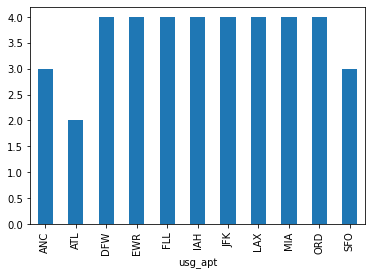

In [16]:
# In df2, calculate the number of rows of each usg_apt whose Year is from 2019 to 2022, no need for type conversion. Name the result as counts.
# Then, find the top 10 usg_apt with the highest number of rows for each year.
# Then, for each usg_apt, calculate the number of rows named counts.
# Make a bar plot of the result, with x axis showing the usg_apt and y axis showing counts.

df2 = df2[df2['Year'].isin([2019, 2020, 2021, 2022])]
counts = df2.groupby(['Year', 'usg_apt']).size()
counts = counts.groupby('Year').nlargest(10)
counts = counts.groupby('usg_apt').size()
counts.plot.bar()

<AxesSubplot: xlabel='usg_apt'>

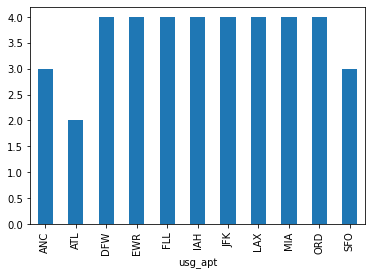

In [47]:
# In df2, calculate the number of rows of each usg_apt whose Year is from 2019 to 2022, no need for type conversion. Name the result as counts.
# Then, for each year, count the number of appearance for each usg_apt, and filter top 10.
# Then, for each usg_apt, calculate the number of rows named counts.# In df3, for each Name, if it has multiple rows, find the sum of all Global Sales for each Name, and store them in new dataframe multi.
# Make a bar plot of the result, with x axis showing the usg_apt and y axis showing counts.

df2 = df2[df2['Year'].isin([2019, 2020, 2021, 2022])]
counts = df2.groupby(['Year', 'usg_apt']).size()
counts = counts.groupby('Year').nlargest(10)
counts = counts.groupby('usg_apt').size()
counts.plot.bar()


In [ ]:

df2 = df2.groupby('Year').apply(lambda x: x.sort_values('usg_apt', ascending=False).head(10))
df2 = df2.groupby('usg_apt').agg({'usg_apt': 'count'})
df2.plot.bar()

In [44]:
df2

usg_apt
Year usg_apt         
2019 ABE            5
     ABI            4
     ABQ           11
     ACK           15
     ACT            1
...               ...
2022 VQS            1
     VRB            2
     WRI            9
     YIP           29
     ZZZ           18

[1435 rows x 1 columns]

# Task 3

### Load Data

In [27]:
df3 = pd.read_csv('vgsales.csv')
df3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Task Description

In this data set, there are records showing the sales of popular video games. We are interested in the `Platform` column, which indicates the platform of the game. We want to check whether multi-platform games have a higher `Global_Sales` than those single-platform games.

### Example

| Name                 | Platform     | Global_Sales                     |
|----------------------|--------------|----------------------------------|
| A                    | PC           | 80                               |
| B                    | PS4          | 65                               |
| B                    | PC           | 25                               |
| C                    | PS4          | 70                               |
| C                    | PC           | 10                               |

In this example, overall sales of `B` is 90, overall sales of `C` is 80. And the average multi-platform sales is indeed better on average than single-platform sales.


 ### Assume that you are quite familiar with data analysis using Python, and you know exactly what each step should do (which is likely for our participants). Now, try to break down the problem into as many sub-steps as you want. Writing corresponding prompts and letting the Copilot generate code for you. Don't worry if you fail.

In [28]:
# In df3, for each Name and its different Platform, calculate the sum of Global_Sales

df3 = df3.groupby(['Name', 'Platform']).agg({'Global_Sales': 'sum'})

In [29]:
# Drop the index of df3, and store the result in df3
# In df3, for each Name, if it has multiple rows, find the sum of all Global Sales for each Name, and store them in new dataframe multi.
# In df3, for each Name, calculate the average Global_Sales for Name with only one Platform, and store them in variable single.
# Calculate the average value of multi
# Calculate the average value of single

df3 = df3.reset_index()


1.6889978370583993